In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models, Input, Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import argmax

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:])).astype("float32") / np.max(x_train)
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:])).astype("float32") / np.max(x_test) 
n_inputs = x_train.shape[1]

def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(history):
  plt.title(label='Model Loss by Epoch', loc='center')
  plt.plot(history.history['loss'], label='Training Data', color='red')
  plt.plot(history.history['val_loss'], label='Test Data', color='black')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

def predict(model):
  reconstructed_images = model.predict(noisy_x_test)

  n = 5
  plt.figure(figsize=(9, 2))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

  plt.show()

noisy_x_train = noise(x_train)
noisy_x_test = noise(x_test)

input_layer = Input(shape=(n_inputs,))

11490434/11490434 [==============================] - 0s 0us/step


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_80 (Dense)            (None, 16)                12560     
                                                                 
 dense_81 (Dense)            (None, 16)                272       
                                                                 
 dense_82 (Dense)            (None, 16)                272       
                                                                 
 dense_83 (Dense)            (None, 784)               13328     
                                                                 
Total params: 26,432
Trainable params: 26,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] 

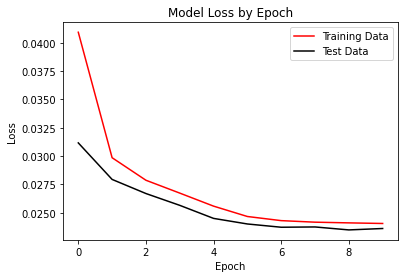

In [ ]:
encoder_layer = layers.Dense(16, activation='relu')(input_layer)
latent_layer = layers.Dense(16, activation='relu')(encoder_layer)
decoder_layer = layers.Dense(16, activation='relu')(latent_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(decoder_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()
history = model.fit(x_train, x_train, epochs=10, batch_size=16, validation_data=(x_test, x_test))
display(history)

In [ ]:
input_layer = Input(shape=(n_inputs,))
encoder_layer = layers.Dense(16, activation='relu')(input_layer)
latent_layer = layers.Dense(16, activation='relu', activity_regularizer=regularizers.L1(1e-4))(encoder_layer)
decoder_layer = layers.Dense(16, activation='relu')(latent_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(decoder_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
'''
model.summary()
history = model.fit(x_train, x_train, epochs=20, batch_size=16, validation_data=(x_test, x_test))
display(history)
predict(model)
'''

'\nmodel.summary()\nhistory = model.fit(x_train, x_train, epochs=20, batch_size=16, validation_data=(x_test, x_test))\ndisplay(history)\npredict(model)\n'

Epoch 1/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0516 - accuracy: 0.0099 - val_loss: 0.0413 - val_accuracy: 0.0078
Epoch 2/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0389 - accuracy: 0.0102 - val_loss: 0.0363 - val_accuracy: 0.0109
Epoch 3/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0357 - accuracy: 0.0106 - val_loss: 0.0343 - val_accuracy: 0.0089
Epoch 4/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0344 - accuracy: 0.0090 - val_loss: 0.0335 - val_accuracy: 0.0108
Epoch 5/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0336 - accuracy: 0.0097 - val_loss: 0.0328 - val_accuracy: 0.0103
Epoch 6/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0330 - accuracy: 0.0102 - val_loss: 0.0323 - val_accuracy: 0.0107
Epoch 7/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0323 - accuracy: 0.0110 - val_loss: 0.0320 - val_accuracy:

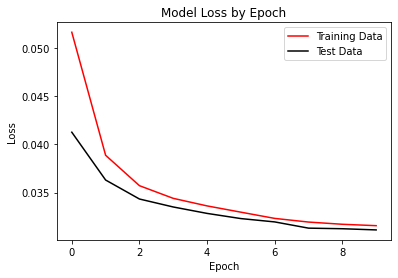

In [ ]:
history = model.fit(noisy_x_train, x_train, epochs=10, batch_size=16, validation_data=(noisy_x_test, x_test))
display(history)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_30 (Dense)            (None, 16)                12560     
                                                                 
 dense_31 (Dense)            (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1112 - accuracy: 0.0174 - val_loss: 0.1088 - val_accuracy: 0.0164
Epoch 2/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1072 - accuracy: 0.0171 - val_loss: 0.1081 - val_accuracy: 0.0135
Epoch 3/10
3750/3750 [=========

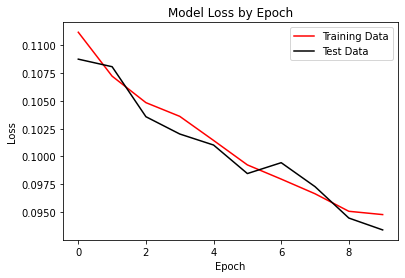

In [ ]:
input_layer = Input(shape=(n_inputs,))
latent_layer = layers.Dense(16, activation='leaky_relu')(input_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(latent_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer=optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['accuracy'])

model.summary()
history = model.fit(x_train, x_train, epochs=10, batch_size=16, validation_data=(x_test, x_test))
display(history)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0346 - accuracy: 0.0091 - val_loss: 0.0303 - val_accuracy: 0.0100
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0306 - accuracy: 0.0102 - val_loss: 0.0300 - val_accuracy: 0.0099
Epoch 3/10
3750/3750 [=========

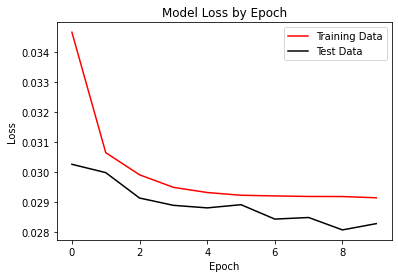

In [ ]:
input_layer = Input(shape=(n_inputs,))
latent_layer = layers.Dense(16, activation='leaky_relu', activity_regularizer=regularizers.L1(10e-5))(input_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(latent_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])

model.summary()
history = model.fit(noisy_x_train, x_train, epochs=10, batch_size=16, validation_data=(noisy_x_test, x_test))
display(history)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_32 (Dense)            (None, 16)                12560     
                                                                 
 dense_33 (Dense)            (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0700 - accuracy: 0.0115 - val_loss: 0.0676 - val_accuracy: 0.0083
Epoch 2/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0673 - accuracy: 0.0122 - val_loss: 0.0676 - val_accuracy: 0.0143
Epoch 3/10
3750/3750 [=========

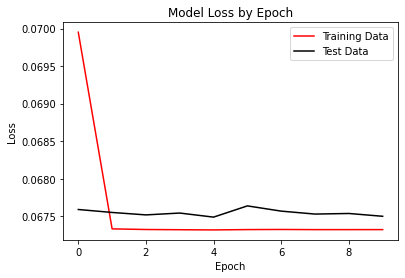

In [ ]:
# shallow & underfitting
input_layer = Input(shape=(n_inputs,))
latent_layer = layers.Dense(16, activation='tanh')(input_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(latent_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()
history = model.fit(x_train, x_train, epochs=10, batch_size=16, validation_data=(x_test, x_test))
display(history)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_72 (Dense)            (None, 16)                12560     
                                                                 
 dense_73 (Dense)            (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 27s 7ms/step - loss: 0.0716 - accuracy: 0.0127 - val_loss: 0.0691 - val_accuracy: 0.0161
Epoch 2/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0689 - accuracy: 0.0120 - val_loss: 0.0692 - val_accuracy: 0.0161
Epoch 3/10
3750/3750 [=======

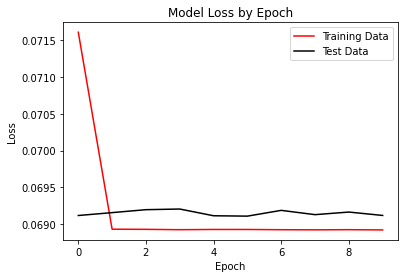

In [ ]:
# shallow & underfitting
input_layer = Input(shape=(n_inputs,))
latent_layer = layers.Dense(16, activation='tanh', activity_regularizer=regularizers.L1(10e-5))(input_layer)
output_layer = layers.Dense(n_inputs, activation='sigmoid')(latent_layer)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()
history = model.fit(noisy_x_train, x_train, epochs=10, batch_size=16, validation_data=(noisy_x_test, x_test))
display(history)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 500)               392500    
                                                                 
 dense_37 (Dense)            (None, 300)               150300    
                                                                 
 dense_38 (Dense)            (None, 100)               30100     
                                                                 
 dense_39 (Dense)            (None, 16)                1616      
                                                                 
 dense_40 (Dense)            (None, 100)               1700      
                                                                 
 dense_41 (Dense)            (None, 300)               303

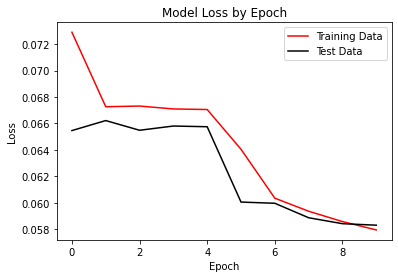

In [ ]:
x_train = x_train[:2000]
x_test = x_test[:2000]

out = layers.Dense(500, activation='sigmoid')(input_layer)
out = layers.Dense(300, activation='sigmoid')(out)
out = layers.Dense(100, activation='sigmoid')(out)
out = layers.Dense(16, activation='tanh')(out)
out = layers.Dense(100, activation='sigmoid')(out)
out = layers.Dense(300, activation='sigmoid')(out)
out = layers.Dense(500, activation='sigmoid')(out)
out = layers.Dense(n_inputs, activation='sigmoid')(out)

model = Model(input_layer, out)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, x_train, epochs=10, batch_size=16, validation_data=(x_test, x_test))
display(history)

Epoch 1/10
125/125 [==============================] - 3s 18ms/step - loss: 0.1011 - accuracy: 0.0040 - val_loss: 0.0861 - val_accuracy: 0.0150
Epoch 2/10
125/125 [==============================] - 2s 17ms/step - loss: 0.0841 - accuracy: 0.0135 - val_loss: 0.0786 - val_accuracy: 0.0080
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0772 - accuracy: 0.0100 - val_loss: 0.0741 - val_accuracy: 0.0100
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0733 - accuracy: 0.0080 - val_loss: 0.0715 - val_accuracy: 0.0120
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0711 - accuracy: 0.0075 - val_loss: 0.0698 - val_accuracy: 0.0110
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0697 - accuracy: 0.0085 - val_loss: 0.0688 - val_accuracy: 0.0150
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0686 - accuracy: 0.0115 - val_loss: 0.0679 - val_accuracy: 0.0115

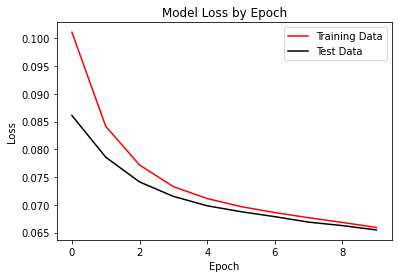

In [ ]:
noisy_x_train = noise(x_train)
noisy_x_test = noise(x_test)

out = layers.Dense(500, activation='sigmoid')(input_layer)
out = layers.Dense(300, activation='sigmoid')(out)
out = layers.Dense(100, activation='sigmoid')(out)
out = layers.Dense(16, activation='tanh', activity_regularizer=regularizers.L1(10e-6))(out)
out = layers.Dense(100, activation='sigmoid', activity_regularizer=regularizers.L1(0.0001))(out)
out = layers.Dense(300, activation='sigmoid', activity_regularizer=regularizers.L1(0.0001))(out)
out = layers.Dense(500, activation='sigmoid', activity_regularizer=regularizers.L1(0.0001))(out)
out = layers.Dense(n_inputs, activation='sigmoid')(out)

model = Model(input_layer, out)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(noisy_x_train, x_train, epochs=10, batch_size=16, validation_data=(noisy_x_test, x_test))
display(history)

313/313 [==============================] - 1s 2ms/step


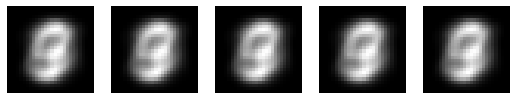

In [ ]:
reconstructed_images = model.predict(x_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

4/4 [==============================] - 0s 5ms/step


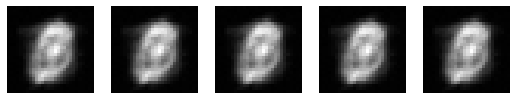

In [ ]:
reconstructed_images = model.predict(x_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

4/4 [==============================] - 0s 9ms/step


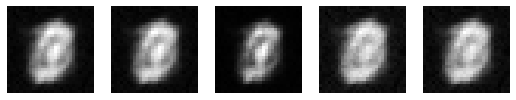

In [ ]:
reconstructed_images = model.predict(noisy_x_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()